In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import libraries

import pandas as pd
import datetime 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import scatter_matrix
import time

In [4]:
# options

# start and end date for data
start = datetime.datetime(2020, 2, 1)
end = datetime.datetime(2020, 3, 30)

# parameters
moving_avg_window = 5

# define stock buckets
companies_dict = {
                  'Tech': ['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT', 'AMZN', 'TSLA', 'QCOM', 'BABA', 'TEAM', 'ZM', 'ADBE',
                          'ZEN', 'CRM', 'WORK', 'CSCO', 'NVDA', 'PANW', 'SPLK', 'ORCL', 'SAP', 'YELP'],
                  'BlueChip': ['NKE', 'WMT', 'KO', 'DIS', 'MCD', 'COST', 'SBUX', 'HD', 'MMM', 'VZ', 'T', 'GIS'],
                  'Biotech': ['ILMN', 'INO', 'MRNA', 'PFE', 'TMO', 'ABT', 'BAYRY', 'JNJ', 'LGND', 'VNDA',
                             'ARNA', 'GLPG', 'TECH', 'NBIX', 'KOD', 'FTSV', 'BIIB', 'BSX', 'GILD', 'EW',
                             'XRAY', 'RMD', 'AMGN', 'RHHBY', 'VRTX', 'EXEL', 'TAK', 'MDT', 'NVS'],
                  'Cannabis': ['HEXO', 'ACB', 'APHA.TO', 'TLRY', 'GTII', 'IIPR', 'SII.TO', 'CGC', 'GWPH', 'CURLF',
                              'CRON', 'GTBIF', 'TLRY', 'APHA', 'TCNNF', 'HRVSF'],
                  'Airlines and Cruises': ['UAL', 'DAL', 'LUV', 'AAL', 'SAVE', 'BA', 'CCL', 'RCL', 'JBLU', 'JBLU',
                                          'SKYW', 'HA', 'CPA', 'ALK', 'ALGT'],
                  'Hotel and Dinning': ['GHG', 'HTHT', 'MTN', 'IHG', 'H', 'CHH', 'HLT', 'PK', 'MAR', 'WYND', 'MCRI', 
                                        'WH', 'STAY', 'RRR', 'PLYA', 'NCLH', 'CVEO', 'RLH', 'TH',
                                        'CMG', 'SHAK', 'BJRI', 'DIN', 'CAKE', 'DPZ', 'WEN', 'PZZA', 'LOCO', 
                                        'DENN', 'JACK', 'TACO', 'TAST'],
                  'Oil and Machines': ['PAA', 'XOM', 'CVX', 'OVV', 'MUR', 'RYDAF', 'VLO', 'EOG', 'CXO',
                                       'BP', 'MPC', 'EPD', 'SWN', 'CAT', 'NOG'],
                  'Automotive': ['F', 'GM', 'TM', 'HNDAF', 'BAMXF', 'AZO', 'VLKAF', 'KMX', 'NSANY', 'ORLY',
                                'RNSDF', 'GT', 'MZDAF', 'AUDVF', 'TTM'],
                  'Banking': ['C', 'BAC', 'GS', 'V', 'WFC', 'USB', 'PNC', 'AXP', 'HBCYF', 'SAN', 'ING',
                             'HIFS', 'SIVB', 'EGBN', 'FRC', 'JPM', 'WAL', 'AX', 'FITB']
                 }

In [5]:
# compute dataframe dictionary with adjusted close prices for each bucket

t = time.time()

df_agg = {}
for bucket in companies_dict.keys():
    companies_list = companies_dict[bucket]
    df_agg[bucket] = web.DataReader(companies_list,'yahoo',start=start,end=end)['Adj Close']
    
print(time.time() - t)

77.1053740978241


## Sub-plots of "Adj Close" stock price over time (daily) with moving average

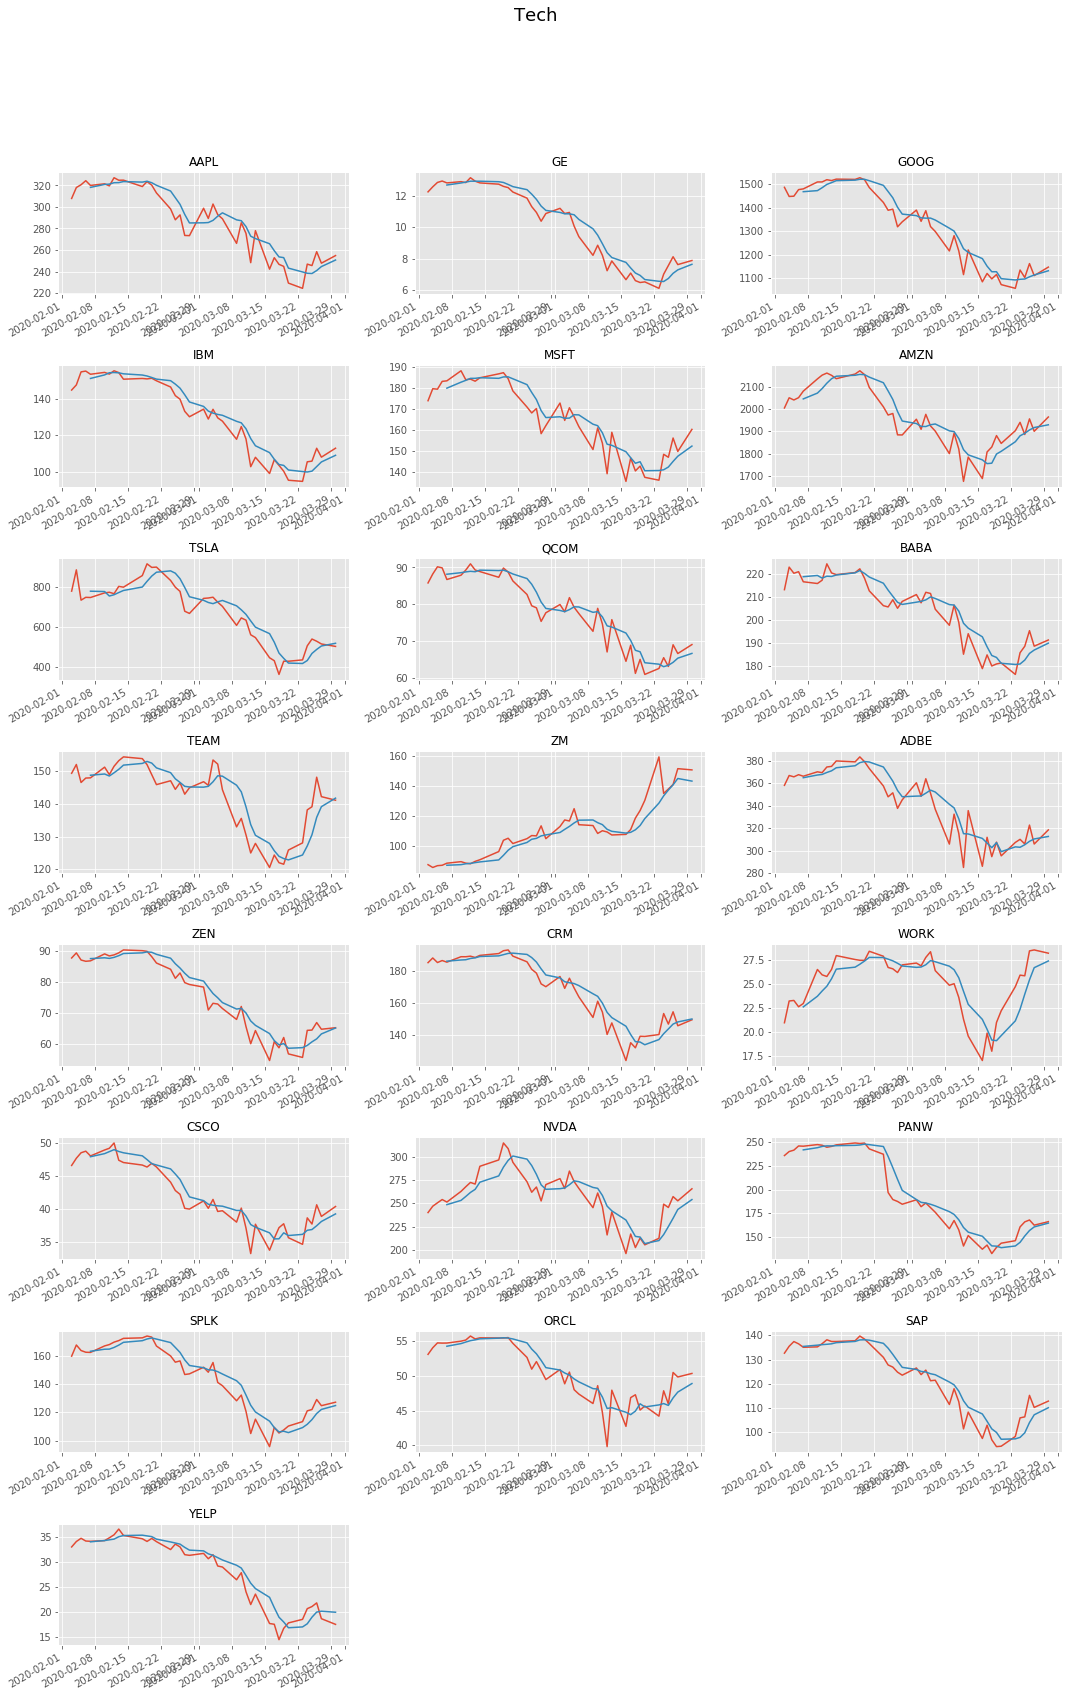

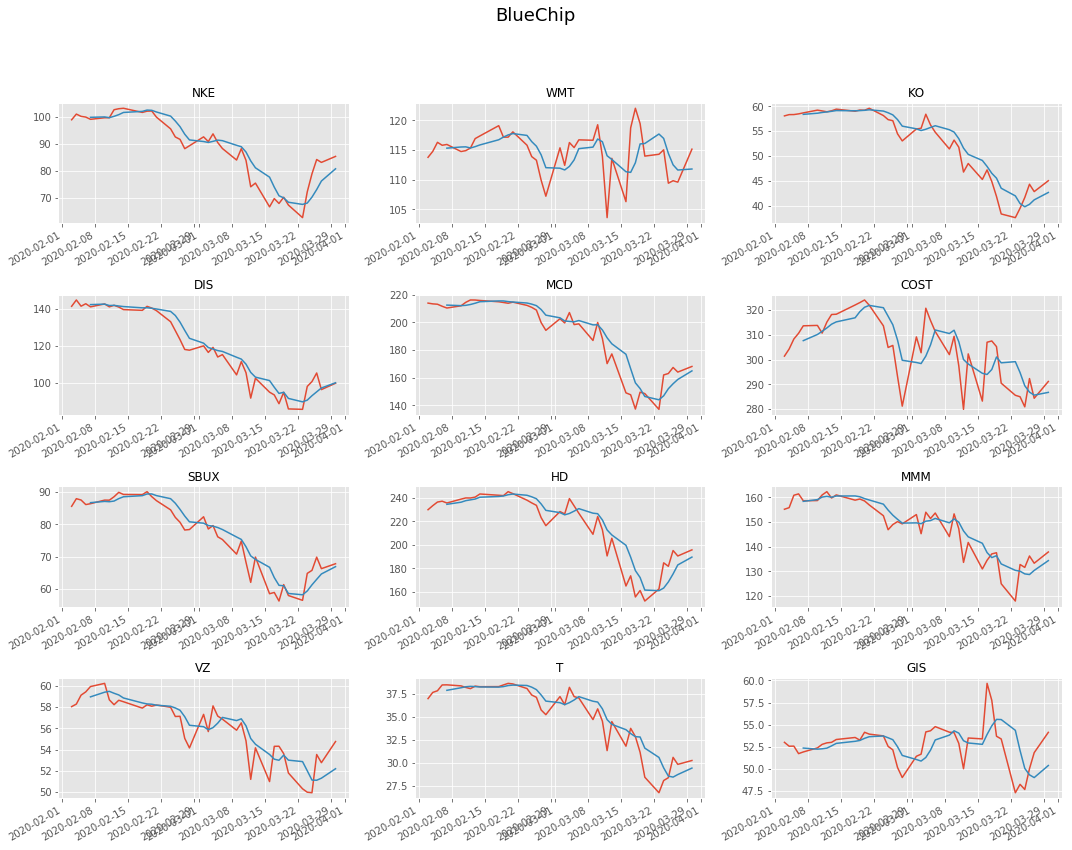

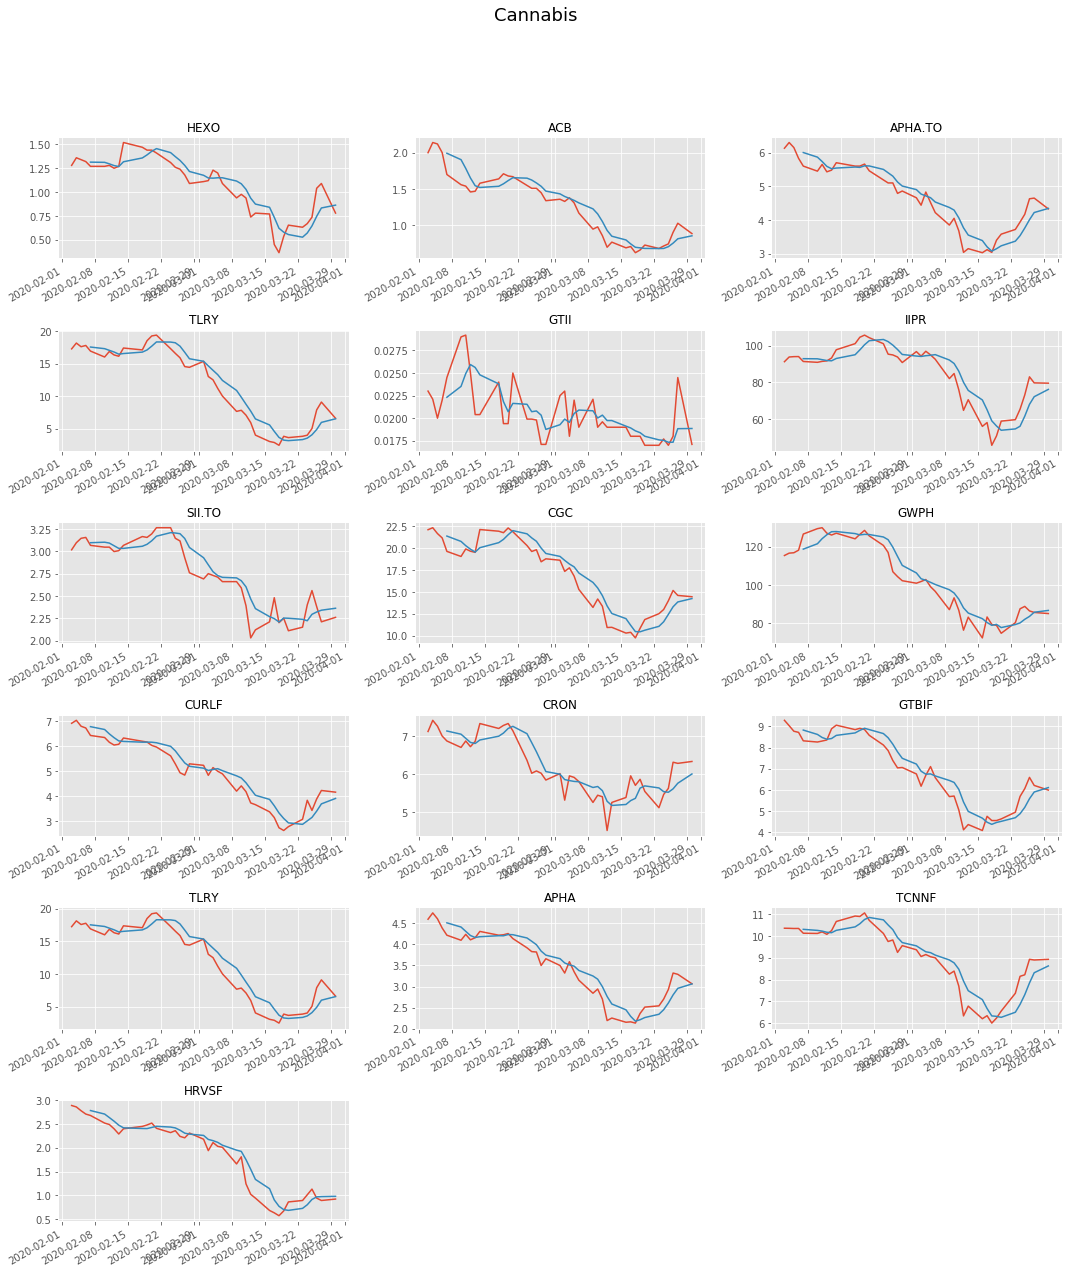

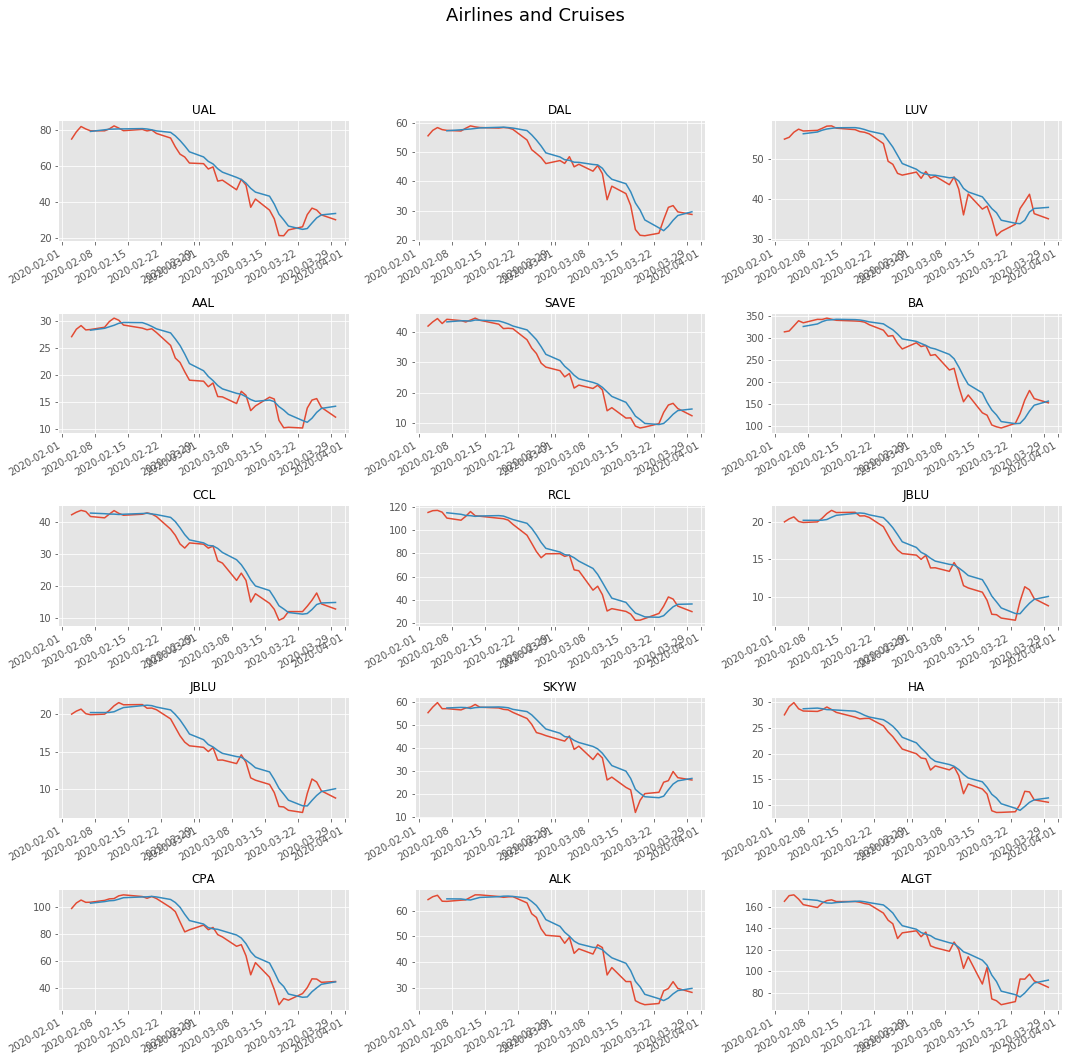

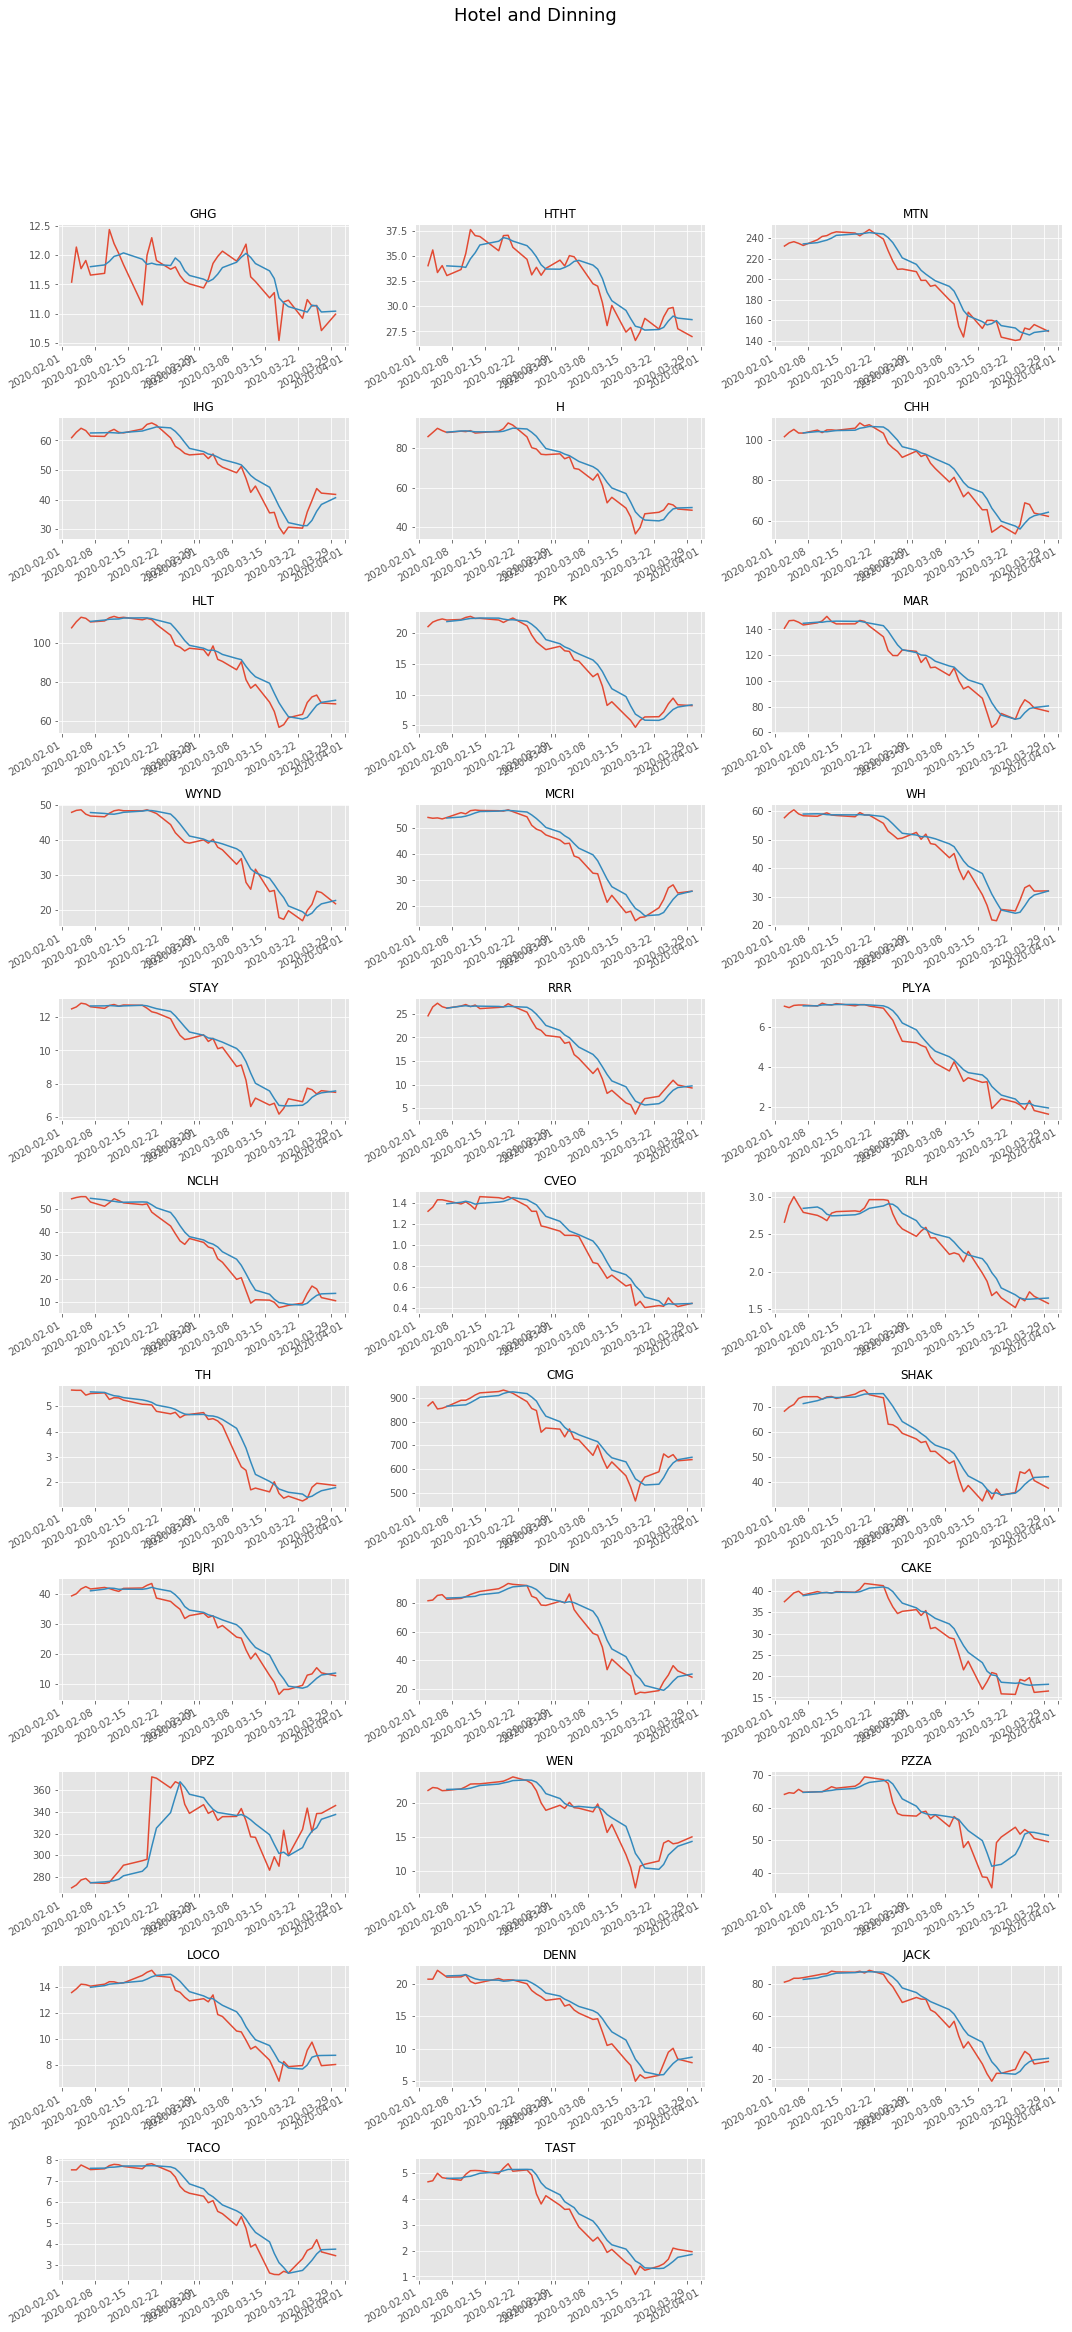

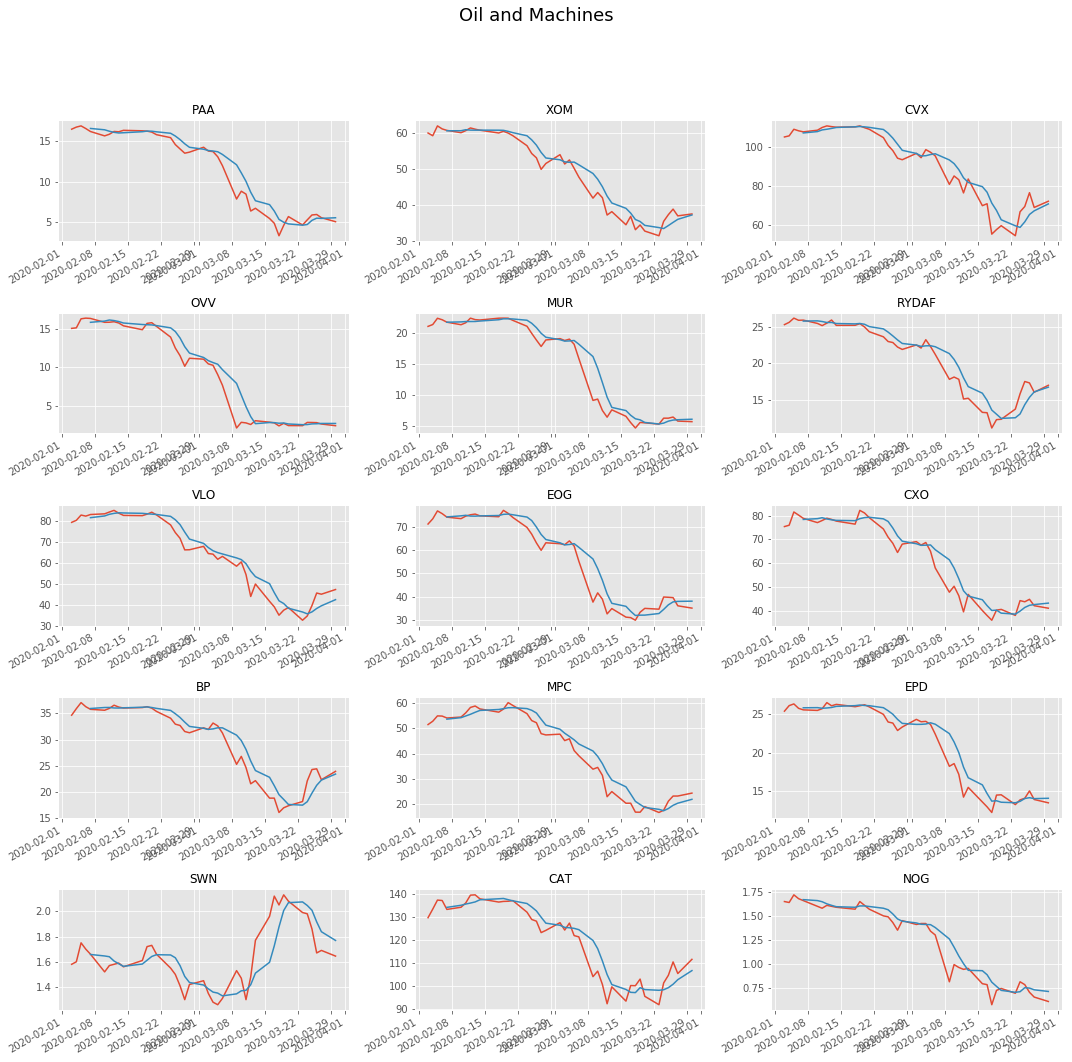

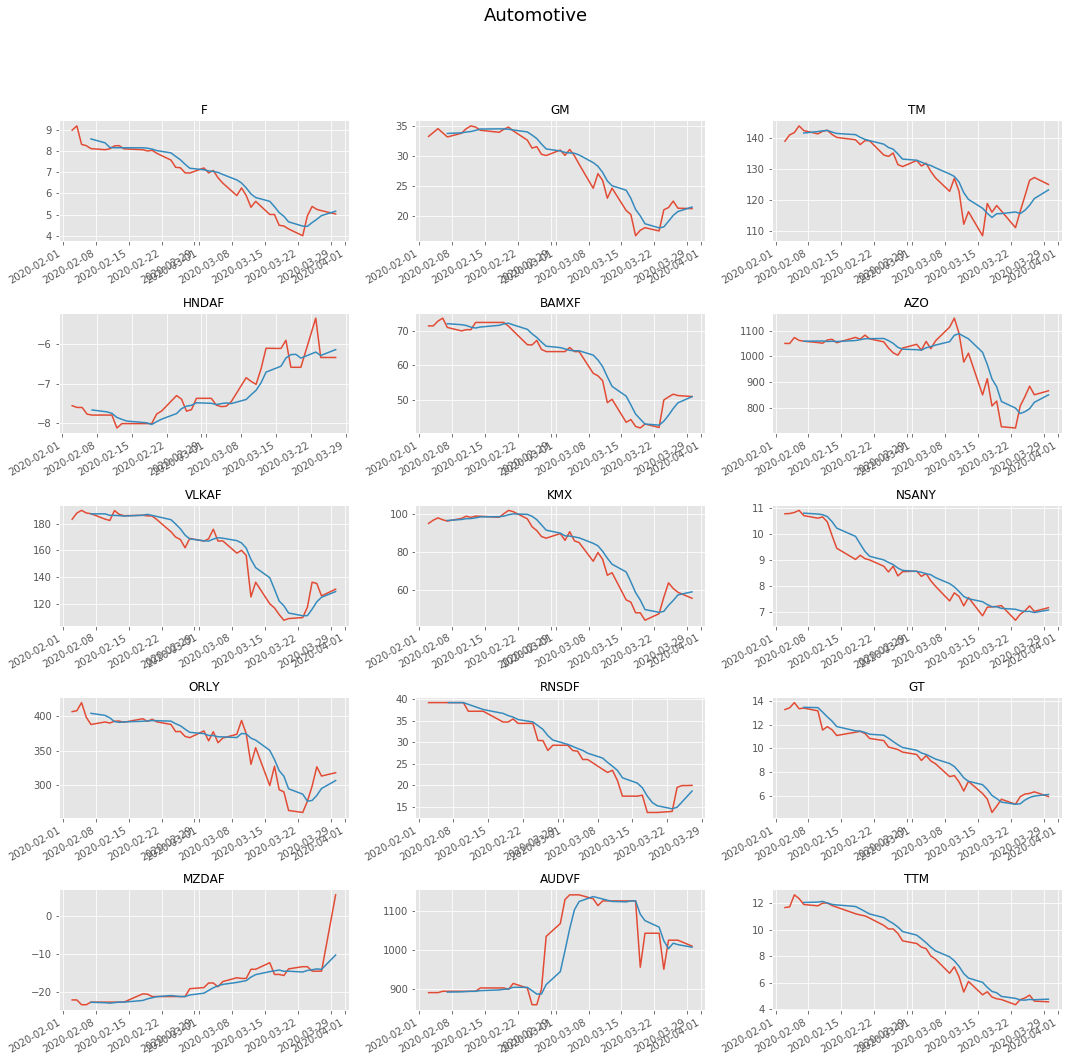

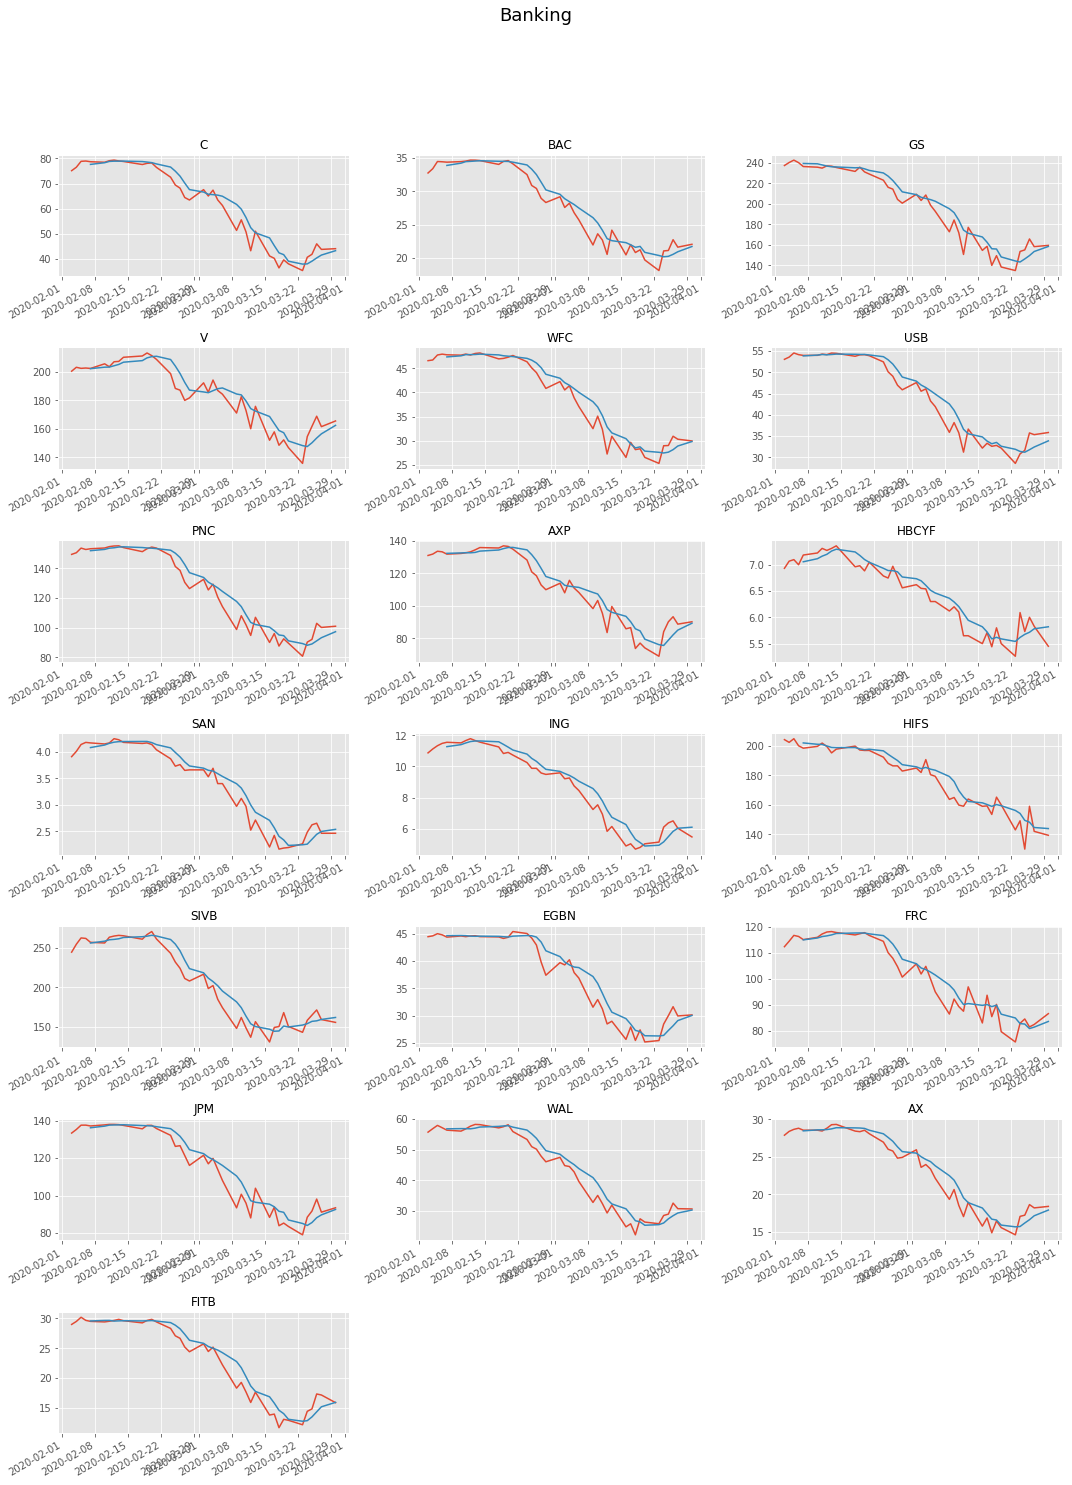

In [6]:
# make subplot for every stocks bucket defined above
for bucket in companies_dict.keys():
    
    # get dataframe of adjusted close prices for current bucket
    companies_list = companies_dict[bucket]
    df = df_agg[bucket]

    # define number of rows and cols
    ncols = 3
    if len(companies_list)%ncols == 0:
        nrows = len(companies_list)/ncols
    else:
        nrows = len(companies_list)//ncols + 1
    
    # define figure for subplot
    width = 15
    height = nrows*3
    fig = plt.figure(figsize=(width,height))
    fig.suptitle(bucket, fontsize=18)

    # plot every symbol
    i = 1 # index for each subplot
    for symbol in companies_list:

        # find close price and moving average for each
        close_px = df[symbol]
        mavg = close_px.rolling(window=moving_avg_window).mean()

        # Adjusting the style of matplotlib
        style.use('ggplot')
        
        # add subplots 
        ax = fig.add_subplot(nrows,ncols,i)
        close_px.plot(label=symbol, ax = ax)
        mavg.plot(label='mavg', ax = ax)   
    
        # change axis settings
        ax.set_title(symbol, fontsize=12)
        ax.xaxis.label.set_visible(False)  
#         ax.tick_params(axis='both', which='major', labelsize=10)

        i+=1 #increase subplot index

    #show plots
    fig.tight_layout(rect=[0, 0, 1, 0.9])

## Correlation analysis in percent change for each bucket

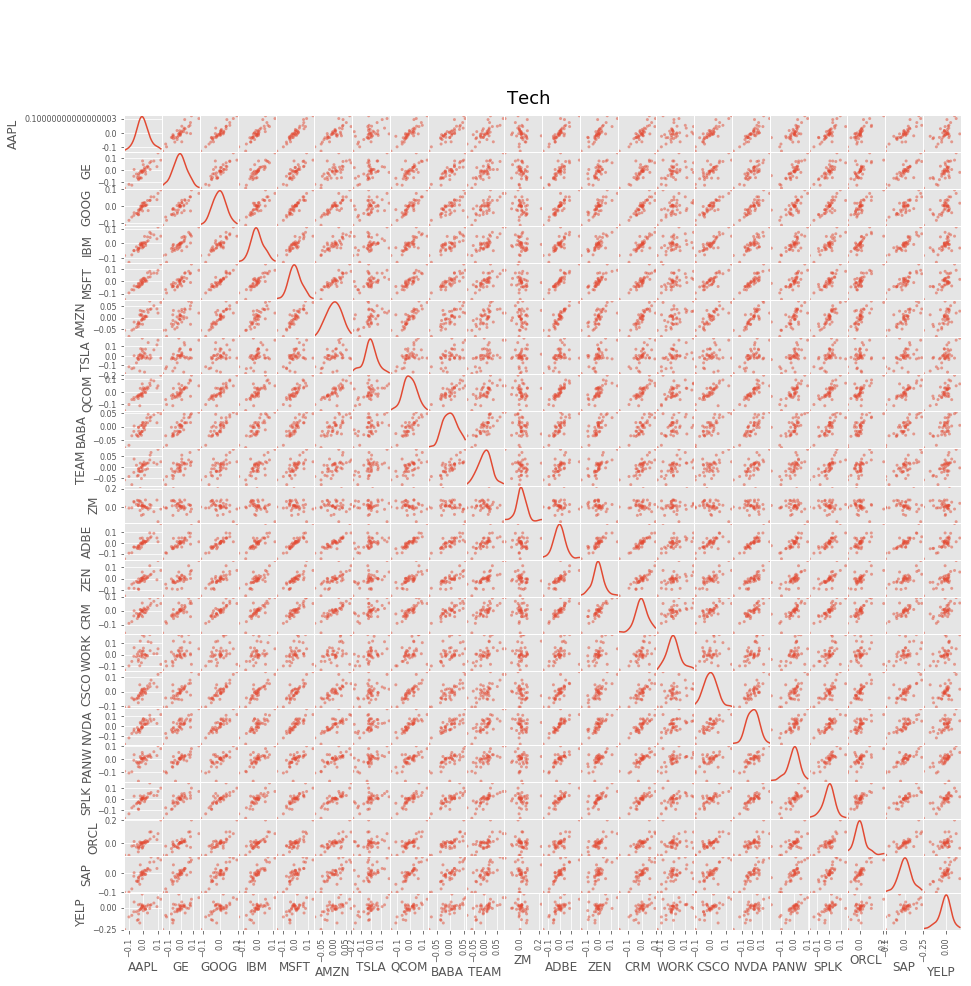

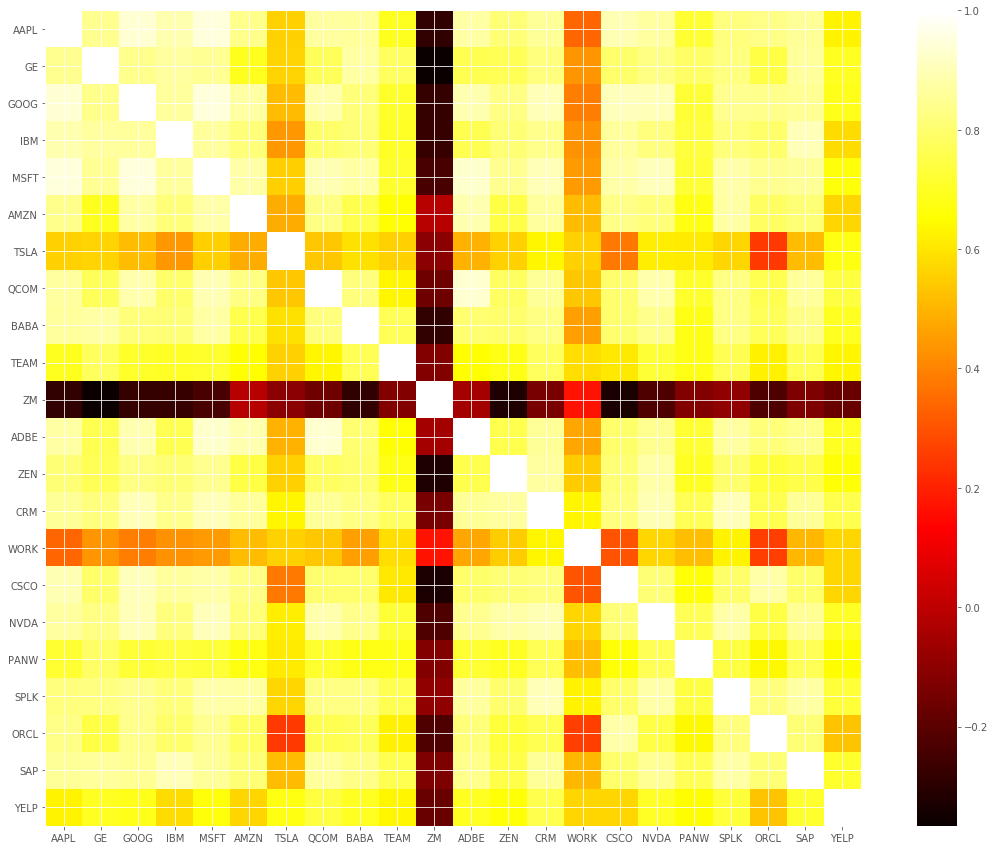

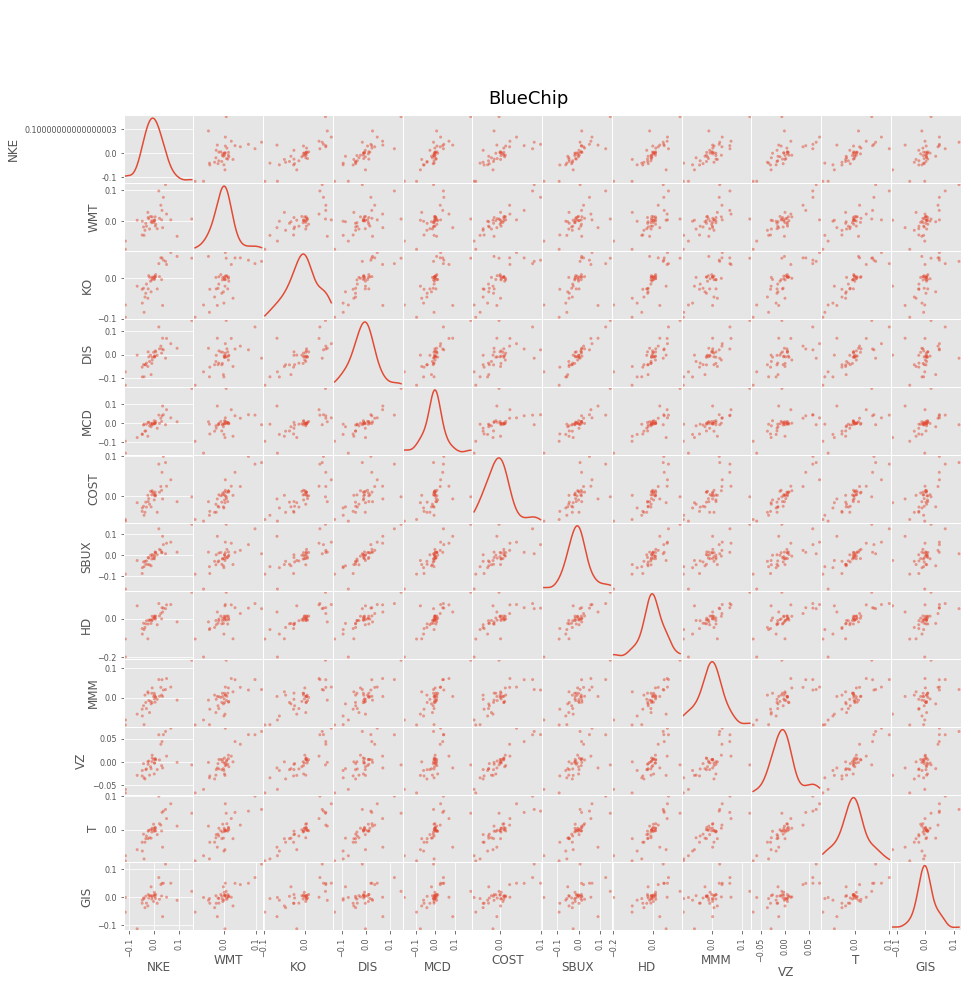

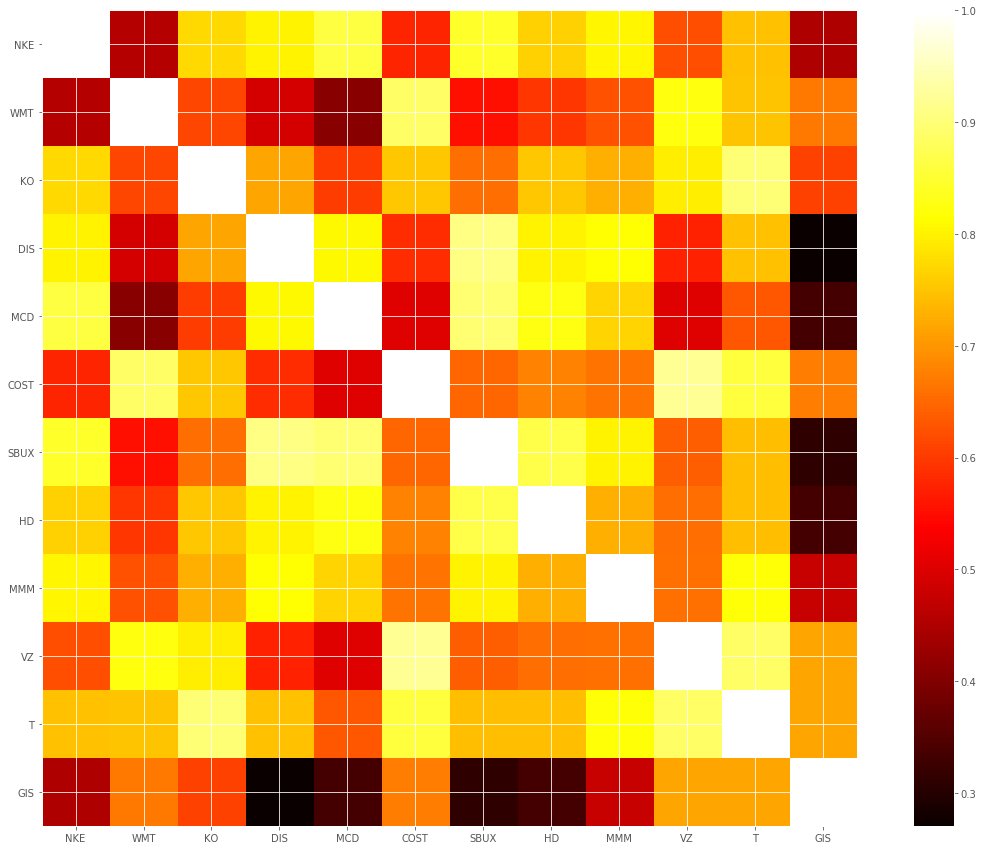

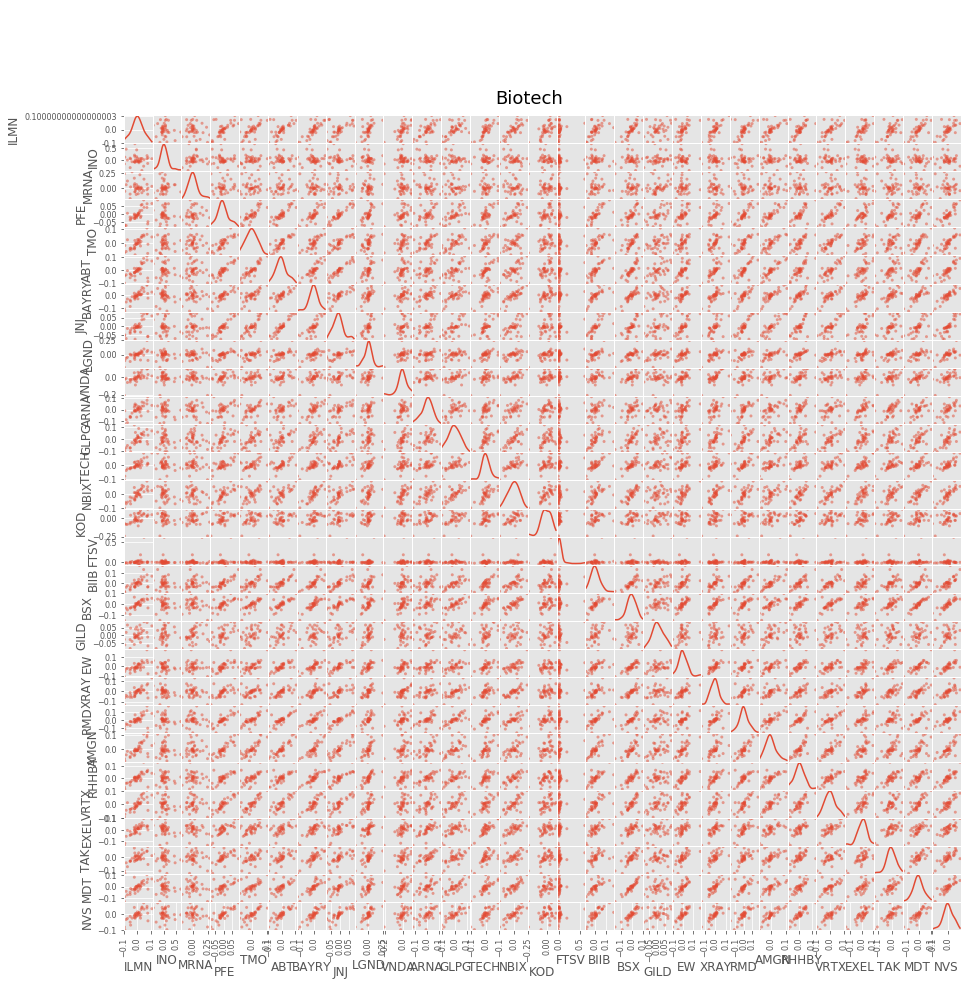

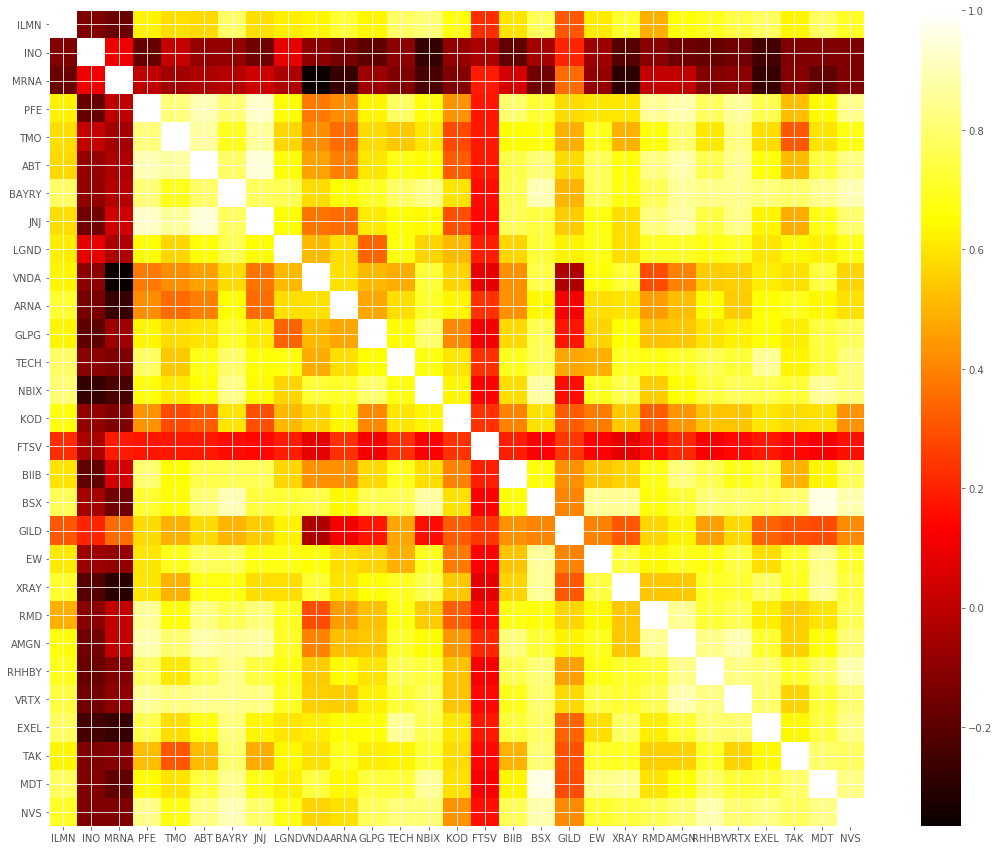

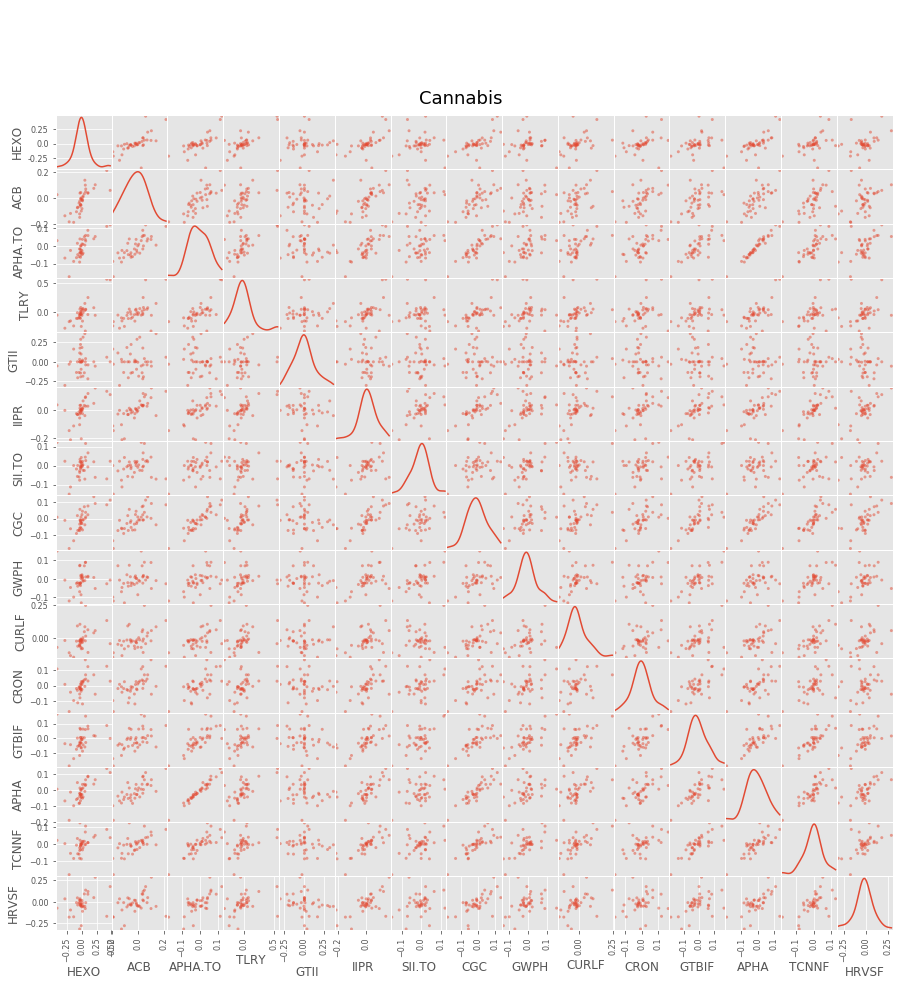

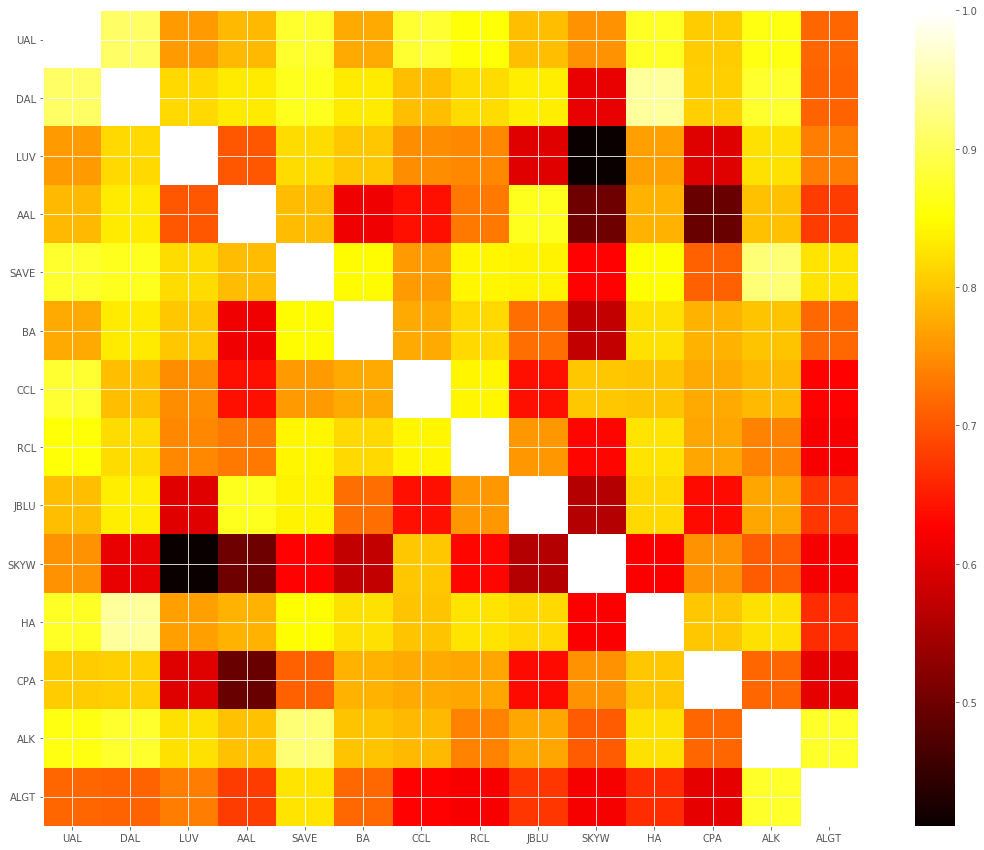

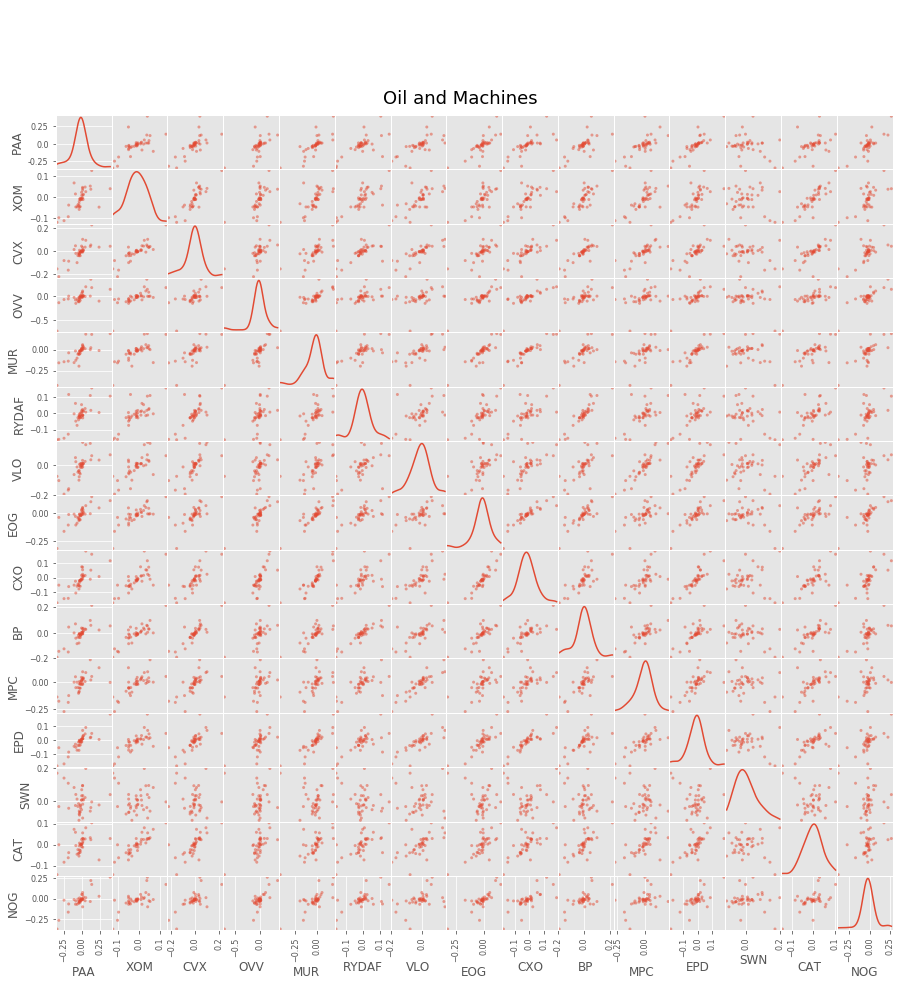

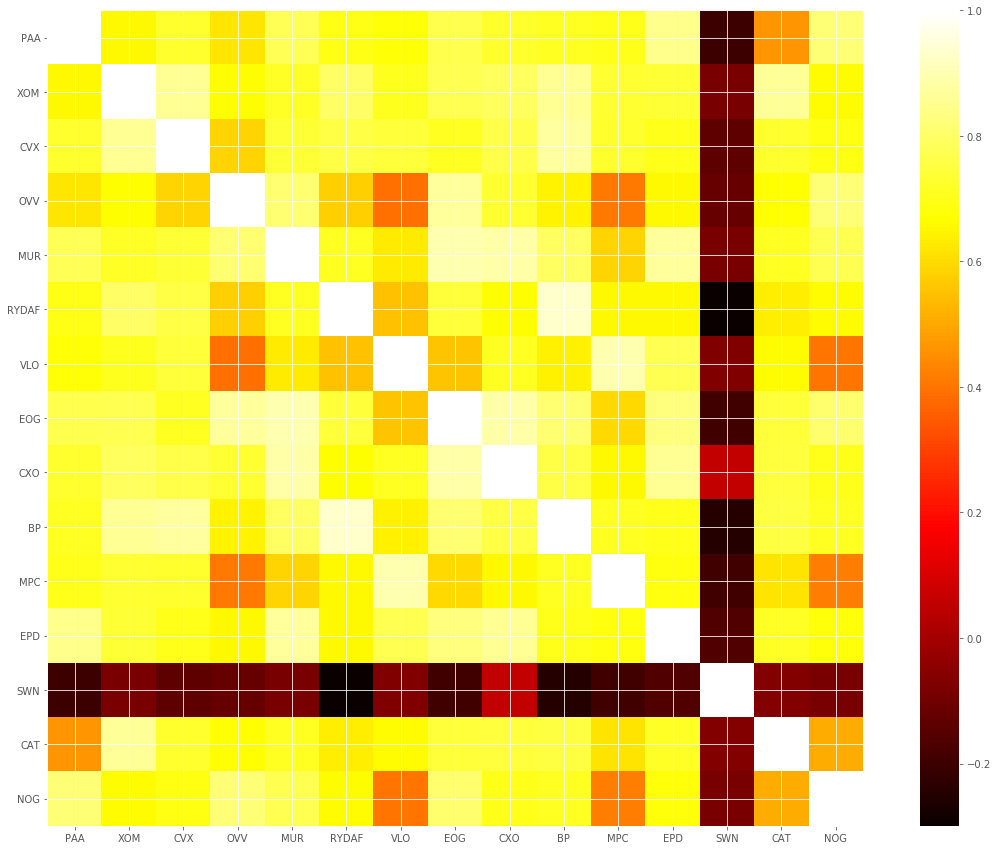

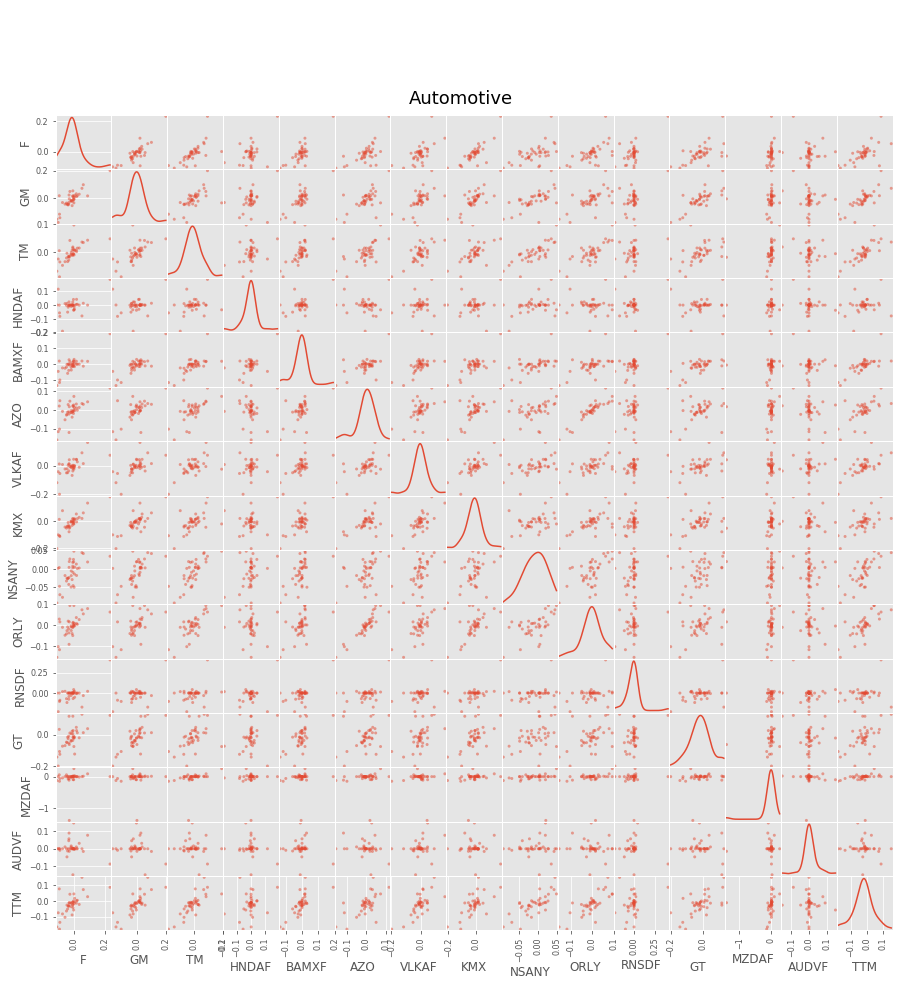

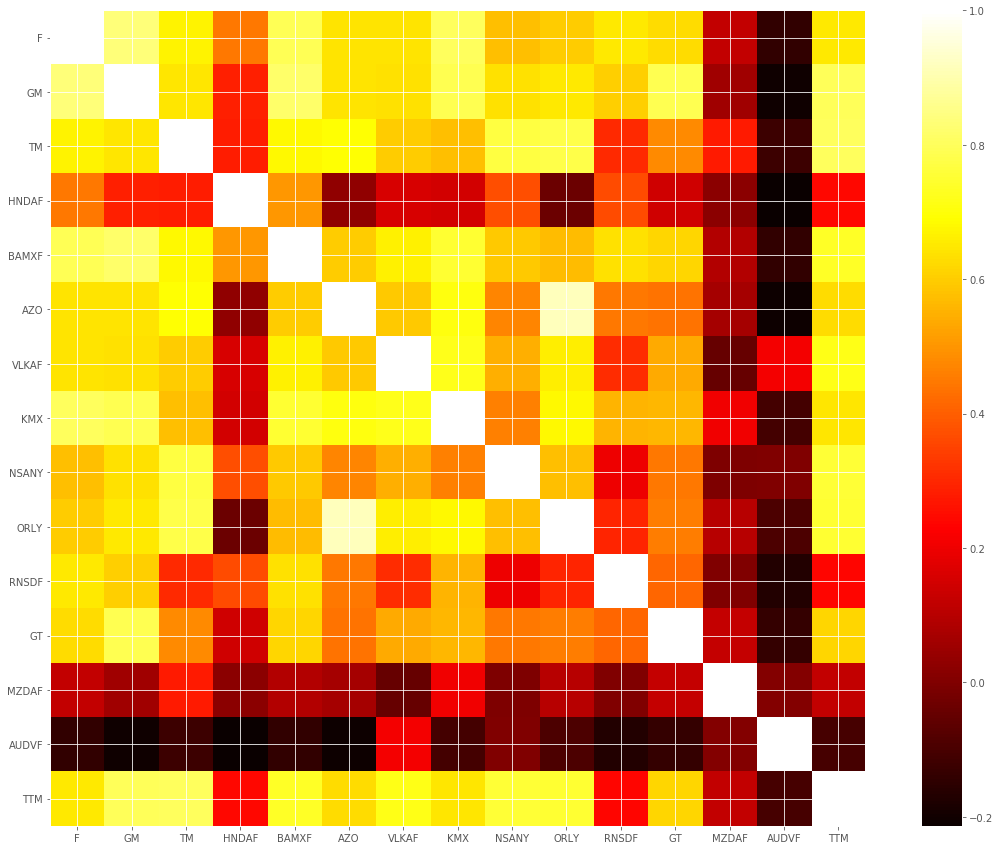

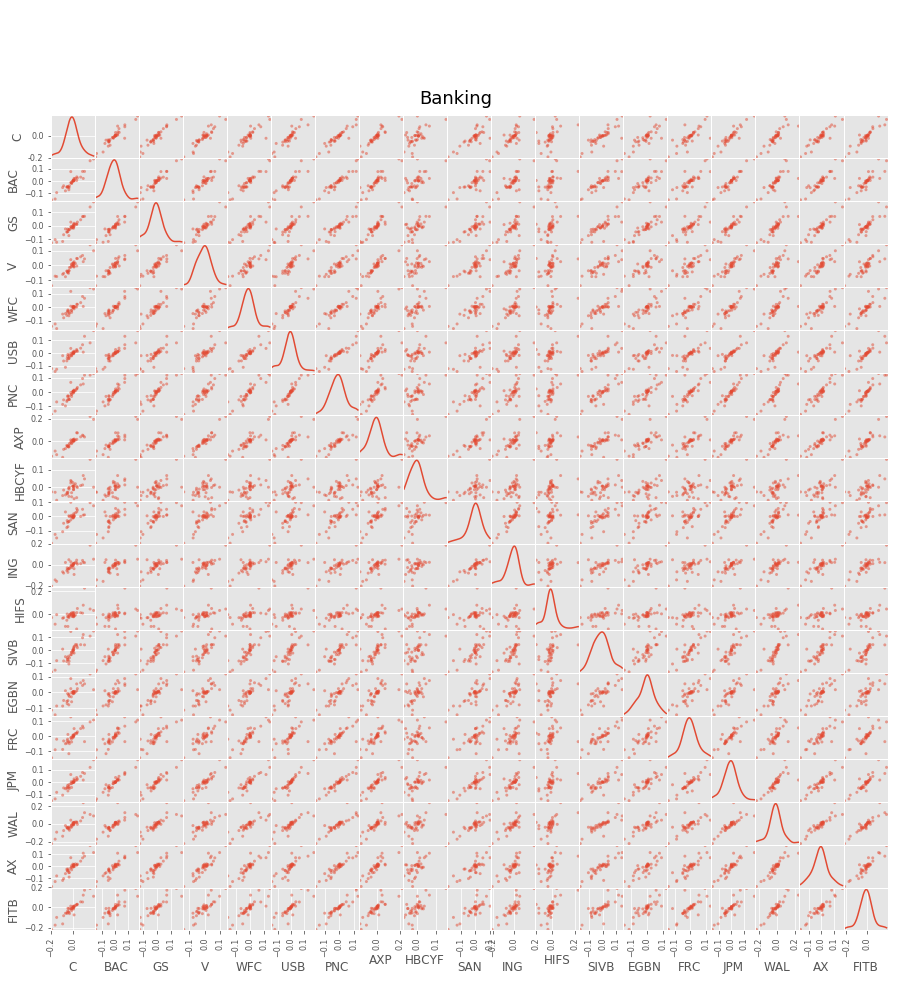

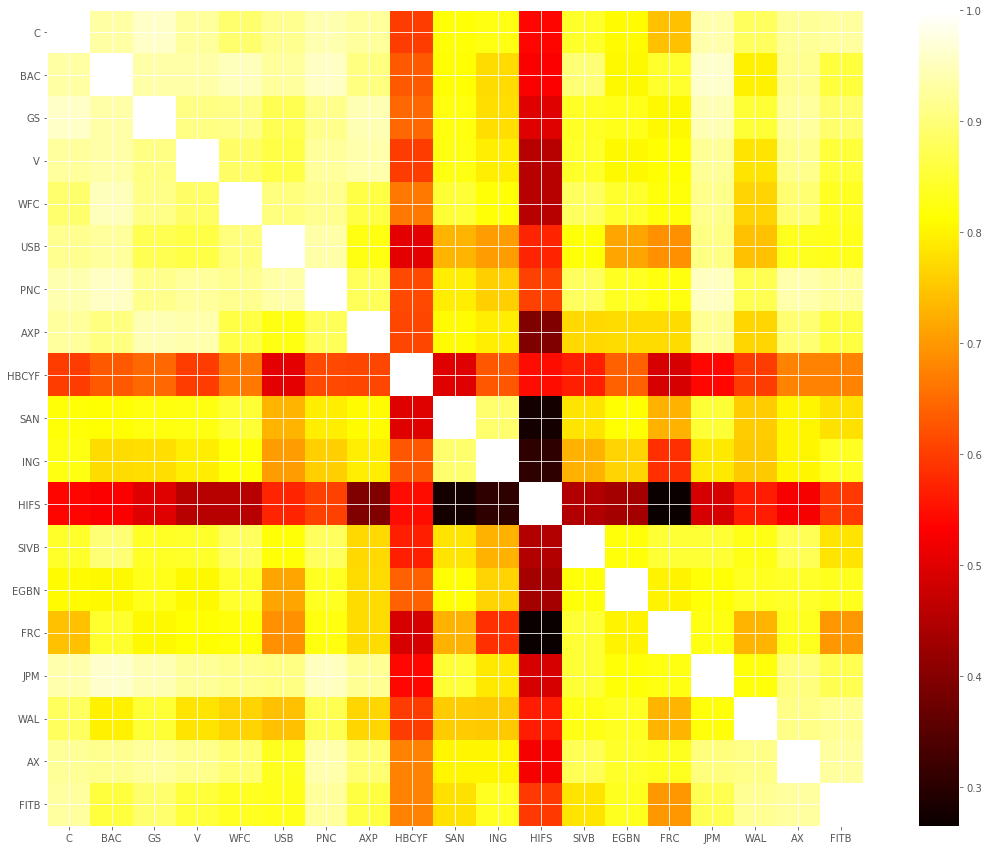

In [7]:
# make correlation plots for each bucket
for bucket in companies_dict.keys():
    
    # get dataframe of adjusted close prices for current bucket
    companies_list = companies_dict[bucket]
    df = df_agg[bucket]

    # compute percent change (aka. return) and correlation
    percent_change = df.pct_change()
    corr = percent_change.corr()
    
    # plot scatter matrix
    scatter_matrix(percent_change, diagonal='kde', figsize=(15, 15), alpha=0.5);
    plt.suptitle('\n\n\n\n'+bucket, fontsize=18)
    
    # plot heatmap of correlation
    plt.figure(figsize=(20, 15))
    plt.imshow(corr, cmap='hot', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns)
    plt.yticks(range(len(corr)), corr.columns)

## Stocks percent change (aka.return rate) and risk

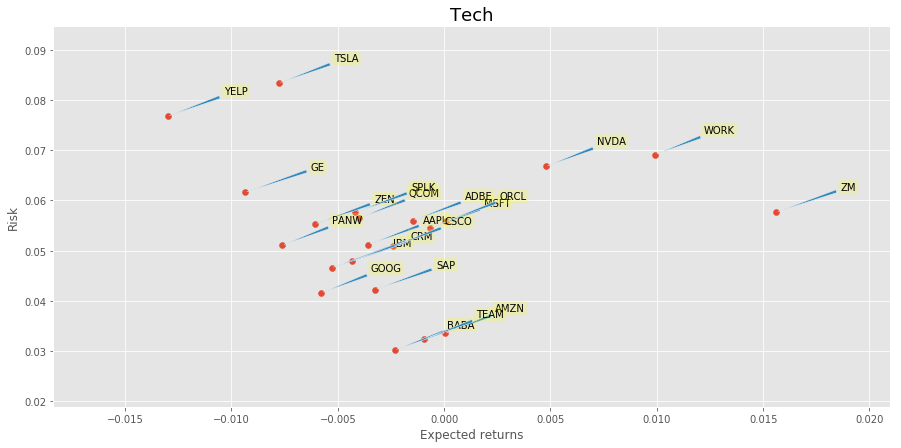

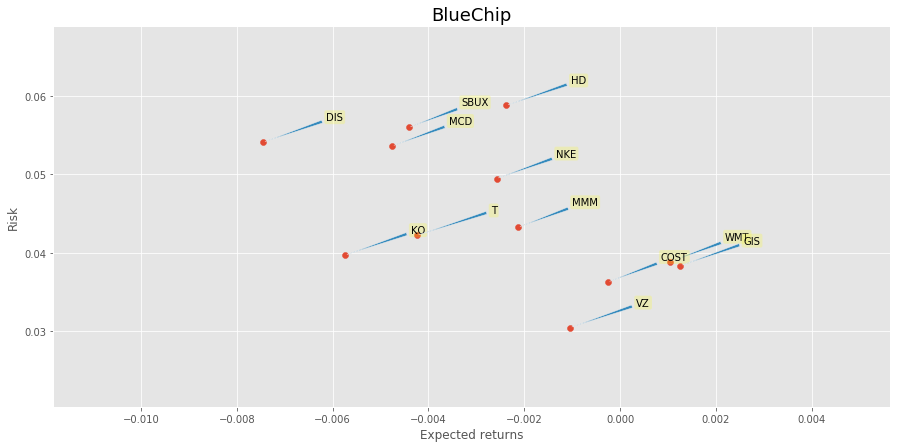

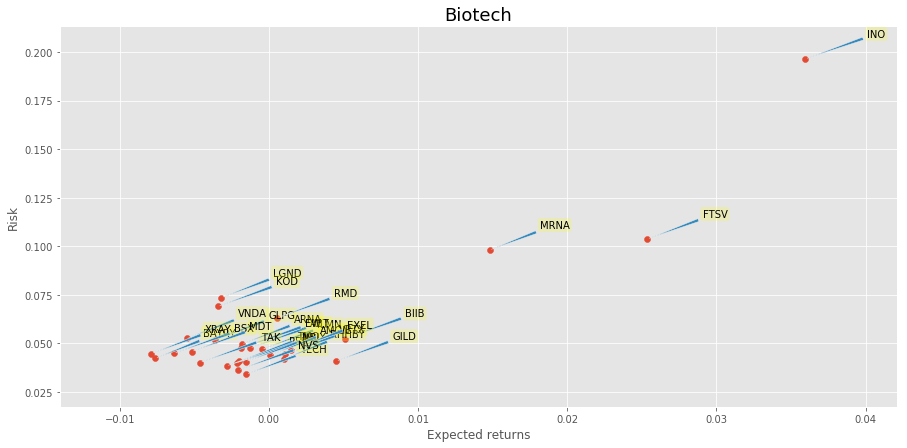

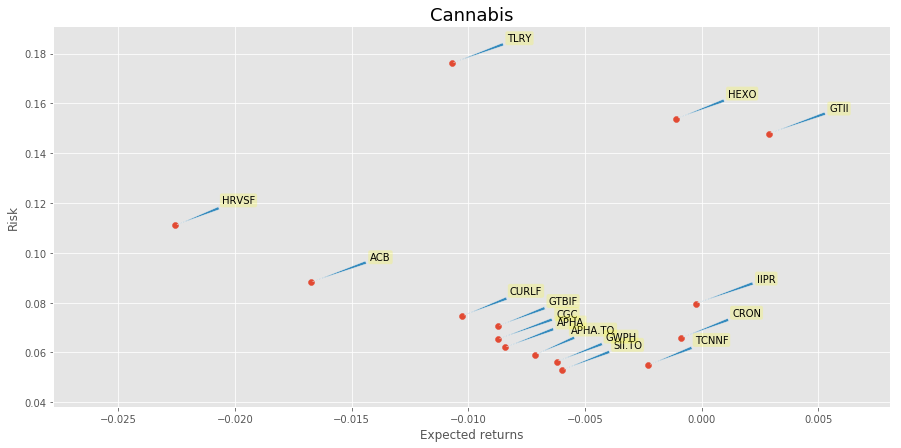

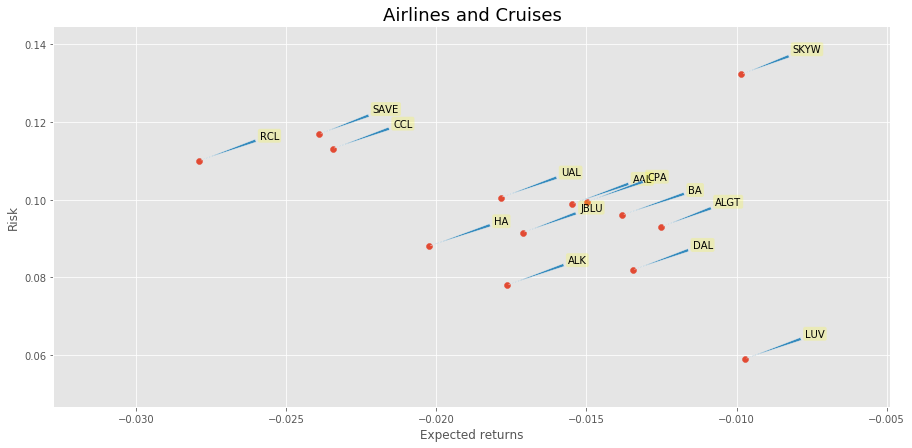

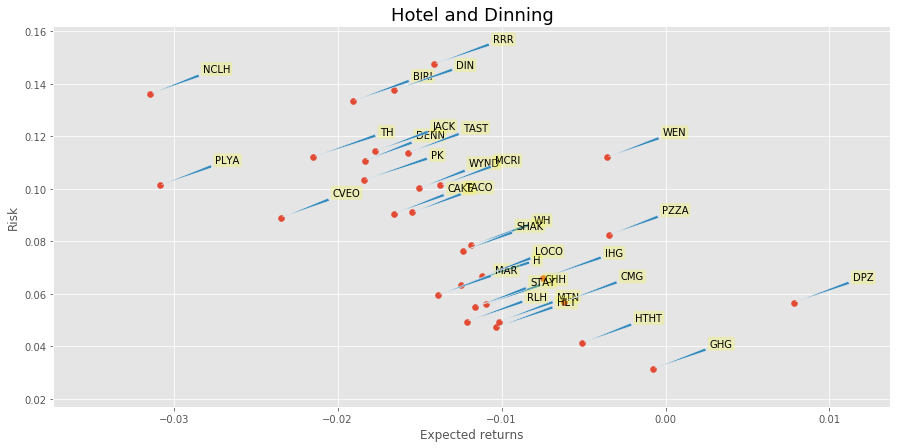

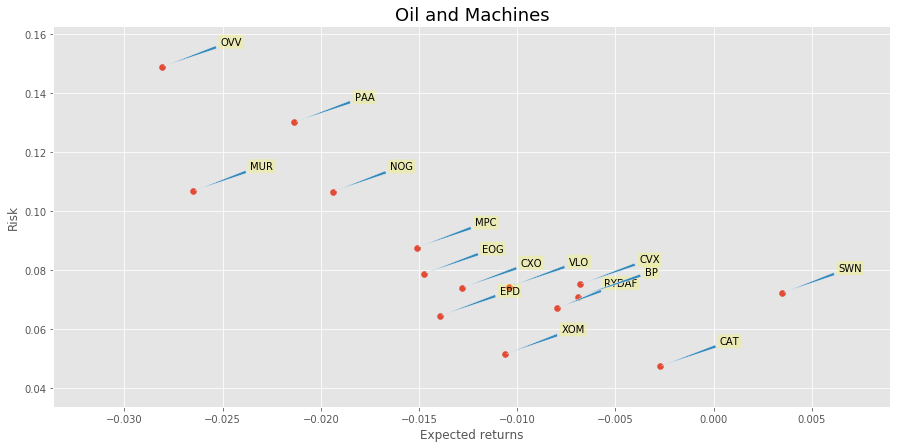

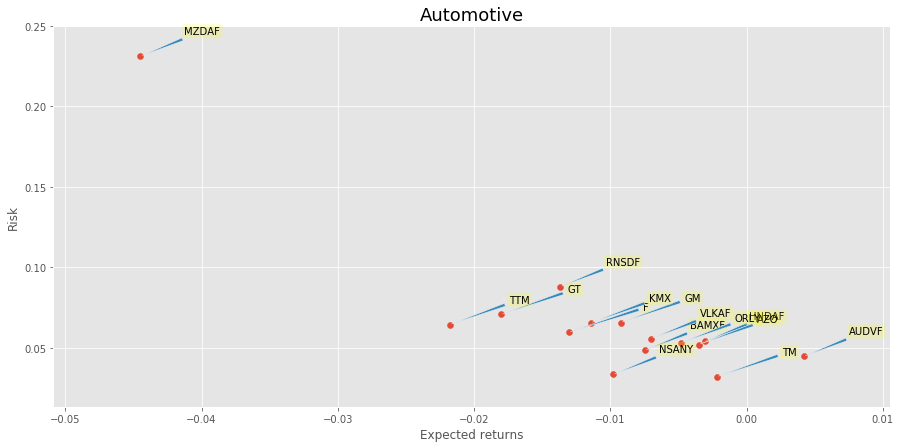

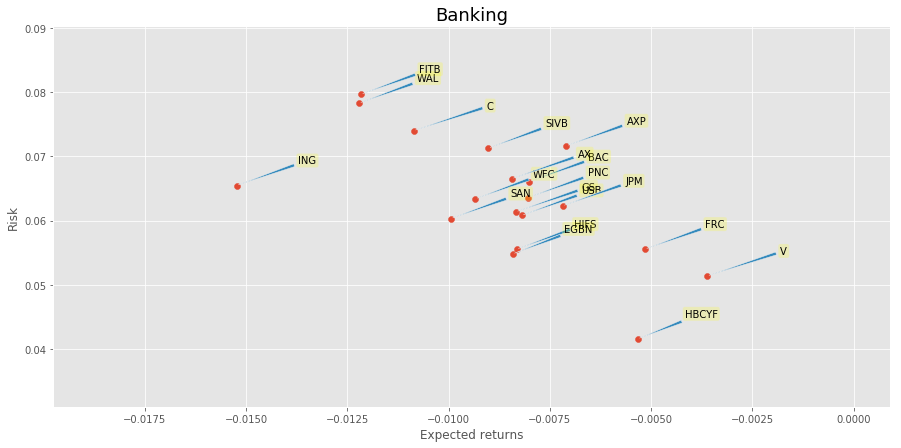

In [8]:
# make risk vs expected returns for each bucket
for bucket in companies_dict.keys():
    
    # get dataframe of adjusted close prices for current bucket
    companies_list = companies_dict[bucket]
    df = df_agg[bucket]
    
    # compute percent change (aka. expected return) 
    percent_change = df.pct_change()
        
    # make risk plots
    plt.figure(figsize=(15,7))
    plt.title(bucket, fontsize=18)
    plt.scatter(percent_change.mean(), percent_change.std())
    plt.xlabel('Expected returns')
    plt.ylabel('Risk')
    for label, x, y in zip(percent_change.columns, percent_change.mean(), percent_change.std()):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (80, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.2', fc = 'yellow', alpha = 0.2),
            arrowprops = dict(arrowstyle = 'wedge', connectionstyle = 'arc3,rad=0'))